In [1]:
from importlib import import_module
import math as m
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
# Specify the run ID (aka problem name).
runid = "nn1dmhd.problems.eplasma1"

# Add the subdirectory for the run results to the module search path.
run_path = os.path.join(".", runid)
sys.path.append(run_path)

# Import the problem definition from the run results directory.
p = import_module(runid)

# Read the run hyperparameters from the run results directory.
import hyperparameters as hp

In [3]:
# Load the training points.
xt_train = np.loadtxt(os.path.join(runid, "xy_train.dat"))
x_train = xt_train[:, 0]
t_train = xt_train[:, 1]

In [4]:
# Extract the unique training point values.
x_train_vals = x_train[::hp.ny_train]
t_train_vals = t_train[:hp.ny_train]
n_x_train_vals = len(x_train_vals)
n_t_train_vals = len(t_train_vals)

In [5]:
# Load the model-predicted values.
Y = []
delY = []
for i in range(len(p.variable_names)):
    var_name = p.variable_names[i]
    Y.append(np.loadtxt(os.path.join(runid, "%s_train.dat" % var_name)))
    delY.append(np.loadtxt(os.path.join(runid, "del_%s_train.dat" % var_name)))


In [6]:
# Load the loss function histories.
losses_model_all = np.loadtxt(os.path.join(runid, "losses_model_all.dat"))
losses_model_bc = np.loadtxt(os.path.join(runid, "losses_model_bc.dat"))
losses_model = np.loadtxt(os.path.join(runid, "losses_model.dat"))
# <HACK>
# Since there is only one model, add a dummy dimension for the model index.
losses_model_all = losses_model_all[..., np.newaxis]
losses_model_bc = losses_model_bc[..., np.newaxis]
losses_model = losses_model[..., np.newaxis]
# </HACK>
losses_all = np.loadtxt(os.path.join(runid, "losses_all.dat"))
losses_bc = np.loadtxt(os.path.join(runid, "losses_bc.dat"))
losses = np.loadtxt(os.path.join(runid, "losses.dat"))


In [7]:
# Compute analytical solutions.
Y_a = np.array([
    p.n10*np.sin(p.kx*x_train - p.w*t_train)
])

In [8]:
# Compute the error in the predicted solutions relative to the analytical solutions.
Y_err = Y - Y_a

In [9]:
# Compute the number of models.
n_models = len(p.variable_names)

# Compute the number of rows for the 2-per-row plot.
n_rows = m.ceil(n_models/2)

# Compute the figure size for model loss plots, assuming 4x4 for each figure, in rows of 2 plots.
loss_figsize = (10, 5)*n_rows

# Compute the figure size for heat maps, assuming 6x4 for each figure, in rows of 2 plots.
heatmap_figsize = (12, 4)*n_rows

# Compute the figure size for the start-and-end comparison plots, in rows of 2 plots.
start_end_figsize = (12, 4)*n_models

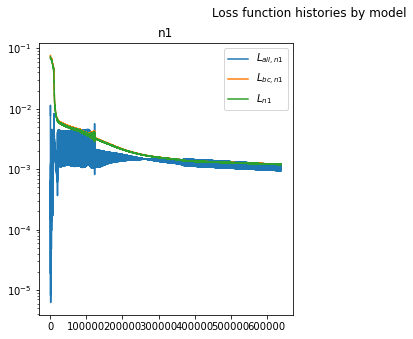

In [10]:
# Plot the loss history for each model.
plt.figure(figsize=loss_figsize)
for i in range(n_models):
    plt.subplot(n_rows, 2, i + 1)
    variable_name = p.variable_names[i]
    plt.semilogy(losses_model_all[:, i], label="$L_{all,%s}$" % variable_name)
    plt.semilogy(losses_model_bc[:, i], label="$L_{bc,%s}$" % variable_name)
    plt.semilogy(losses_model[:, i], label="$L_{%s}$" % variable_name)
    plt.title(variable_name)
    plt.legend()
plt.suptitle("Loss function histories by model")
plt.show()

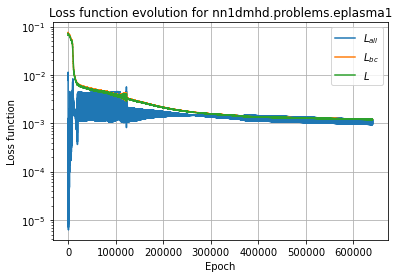

In [11]:
# Plot the total loss function history.
plt.semilogy(losses_all, label="$L_{all}$")
plt.semilogy(losses_bc, label="$L_{bc}$")
plt.semilogy(losses, label="$L$")
plt.xlabel("Epoch")
plt.ylabel("Loss function")
plt.legend()
plt.grid()
plt.title("Loss function evolution for %s" % runid)
plt.show()

In [12]:
# Compute the heat map tick locations and labels.
n_x_ticks = 5
n_t_ticks = 5
x_tick_pos = np.linspace(0, n_x_train_vals - 1, n_x_ticks)
x_tick_labels = ["%.1f" % (x/(n_x_train_vals - 1)) for x in x_tick_pos]
t_tick_pos = np.linspace(0, n_t_train_vals - 1, n_t_ticks)
t_tick_labels = ["%.1f" % (t/(n_t_train_vals - 1)) for t in t_tick_pos]
t_tick_labels = reversed(t_tick_labels)


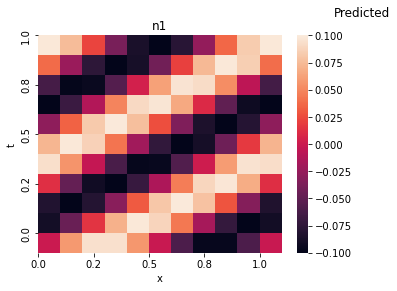

In [13]:
# Plot the model-predicted solutions.
plt.figure(figsize=heatmap_figsize)
for i in range(n_models):
    plt.subplot(n_rows, 2, i + 1)
    variable_name = p.variable_names[0]
    # For a Seaborn heat map, reshape as (n_x, n_y), then transpose, then flip.
    Z = np.flip(Y[i].reshape(hp.nx_train, hp.ny_train).T, axis=0)
    ax = sns.heatmap(Z, vmin=-0.1, vmax=0.1)
    plt.xticks(x_tick_pos, x_tick_labels)
    plt.yticks(t_tick_pos, t_tick_labels)
    ax.set_xlabel("x")
    ax.set_ylabel("t")
    plt.title(variable_name)

plt.suptitle("Predicted")
plt.show()

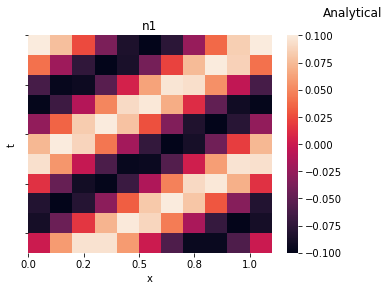

In [14]:
# Plot the analytical solutions.
plt.figure(figsize=heatmap_figsize)
for i in range(n_models):
    plt.subplot(n_rows, 2, i + 1)
    variable_name = p.variable_names[0]
    # For a Seaborn heat map, reshape as (n_x, n_y), then transpose, then flip.
    Z = np.flip(Y_a[i].reshape(hp.nx_train, hp.ny_train).T, axis=0)
    ax = sns.heatmap(Z, vmin=-0.1, vmax=0.1)
    plt.xticks(x_tick_pos, x_tick_labels)
    plt.yticks(t_tick_pos, t_tick_labels)
    ax.set_xlabel("x")
    ax.set_ylabel("t")
    plt.title(variable_name)

plt.suptitle("Analytical")
plt.show()

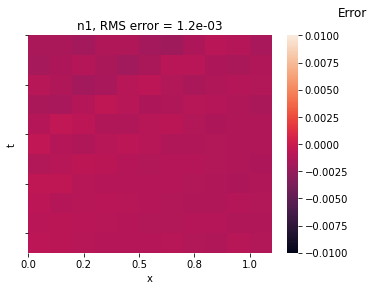

In [17]:
# Plot the error in the predicted solutions.
plt.figure(figsize=heatmap_figsize)
for i in range(n_models):
    plt.subplot(n_rows, 2, i + 1)
    variable_name = p.variable_names[0]
    # For a Seaborn heat map, reshape as (n_x, n_y), then transpose, then flip.
    Z = np.flip(Y_err[i].reshape(hp.nx_train, hp.ny_train).T, axis=0)
    rms_err = np.sqrt(np.mean(Y_err**2))
    ax = sns.heatmap(Z, vmin=-0.01, vmax=0.01)
    plt.xticks(x_tick_pos, x_tick_labels)
    plt.yticks(t_tick_pos, t_tick_labels)
    ax.set_xlabel("x")
    ax.set_ylabel("t")
    plt.title("%s, RMS error = %.1e" % (variable_name, rms_err))

plt.suptitle("Error")
plt.show()

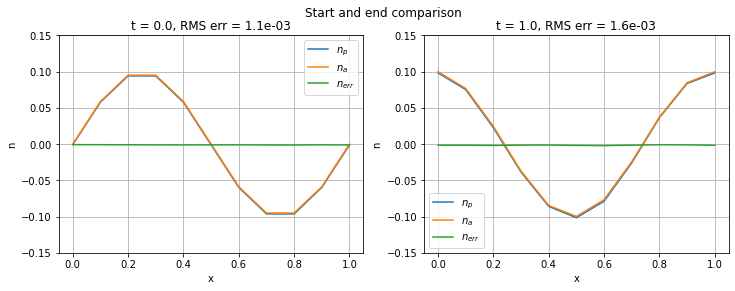

In [16]:
# Compare predicted and analytical solutions at start and end.
plt.figure(figsize=start_end_figsize)
for i in range(n_models):
    variable_name = p.variable_names[0]

    # Compare predicted and analytical values at the starting time.
    plt.subplot(n_rows, 2, i*2 + 1)
    x = x_train_vals
    y = Y[i][0::hp.ny_train]
    y_a = Y_a[i][0::hp.ny_train]
    y_err = Y_err[i][0::hp.ny_train]
    rms_err = np.sqrt(np.mean(y_err**2))
    plt.plot(x, y, label="$%s_p$" % var_name[i])
    plt.plot(x, y_a, label="$%s_a$" % var_name[i])
    plt.plot(x, y_err, label="$%s_{err}$" % var_name[i])
    plt.ylim(-1.5*p.n10, 1.5*p.n10)
    plt.grid()
    plt.legend()
    plt.title("t = %.1f, RMS err = %.1e" % (p.t0, rms_err))
    plt.xlabel("x")
    plt.ylabel(var_name[i])

    plt.subplot(n_rows, 2, i*2 + 2)
    x = x_train_vals
    y = Y[i][hp.ny_train - 1::hp.ny_train]
    y_a = Y_a[i][hp.ny_train - 1::hp.ny_train]
    y_err = Y_err[i][hp.ny_train - 1::hp.ny_train]
    rms_err = np.sqrt(np.mean(y_err**2))
    plt.plot(x, y, label="$%s_p$" % var_name[i])
    plt.plot(x, y_a, label="$%s_a$" % var_name[i])
    plt.plot(x, y_err, label="$%s_{err}$" % var_name[i])
    plt.ylim(-1.5*p.n10, 1.5*p.n10)
    plt.grid()
    plt.legend()
    plt.title("t = %.1f, RMS err = %.1e" % (p.t1, rms_err))
    plt.xlabel("x")
    plt.ylabel(var_name[i])

plt.suptitle("Start and end comparison")
plt.show()